### Lauren Sussman & Madison Davis
https://lsussman1.github.io/DataScienceTutorial/

   The dataset we have begun looking at is the World Happiness Report. The World Happiness Report is a landmark survey of the state of global happiness ranging over 156 countries. The report includes data from the years 2015 to 2019 and includes correlated data about each country’s economic production, social support, life expectancy, freedom, absence of corruption, and generosity – factors that affect the quality of life. This data was collected from the Gallup World Poll, which asks participants to rate how close they are to their ideal possible life on a scale from 0 to 10. The report also includes a benchmark “dystopia” that has “the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support”(Sustainable Development Solutions Network). 
   
   Due to the current issues facing the world, we were intrigued by data that measures something positive. We plan to analyze how different events such as natural disasters and elections affect happiness as well as related measures such as the level of generosity and citizen's perception of corruption. We plan to answer questions such as “did any country experience a significant increase or decrease in happiness?” For example, it would be interesting to analyze the effects on the “Trust (Government Corruption)” score for America after Trump’s election in 2016. Other interesting events to look at might include natural disasters or the beginning or end of a war. We also plan to look at the relationship between wealth and happiness by comparing the “Economy (GDP per capita)” score to the “Happiness Score” per country. This may give some insight into the common discussion of “can money buy happiness?” With this question, we predict that money and happiness may be proportional until a certain threshold. Another factor that will likely affect this correlation is the distribution of wealth within a country, which might be available through another database. Another relevant question to ask would be comparing the happiness score with the rate of Coronavirus deaths per country, which is data we will likely be able to source. Rather than determining if Coronavirus deaths affected happiness score (which is not possible because there is no data yet for 2020), we could determine if national happiness played a role in how well countries dealt with the Coronavirus outbreak. Countries with happier people might have had an easier time convincing their citizens to stay home, social distance, and wear a mask, leading to lower death rates.
     
### Project Plan

   We plan to meet on Zoom each Thursday after class to review what tasks need to be completed before each Milestone deadline. We will make sure to leave each meeting with both partners understanding what they are responsible for completing before the next meeting. We set up a private Github repository to collaborate on code, and will communicate via text to stay updated on any roadblocks or bugs we are experiencing.
    
### References

Sustainable Development Solutions Network. “World Happiness Report.” Kaggle, 27 Nov. 2019, www.kaggle.com/unsdsn/world-happiness. 
https://plot.ly/python/choropleth-maps/


In [1]:
#Install package for world map
!pip install plotly==3.10.0

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 20

#Read in comma seperated files as dataframes
happiness2015 = pd.read_csv("2015.csv")
happiness2016 = pd.read_csv("2016.csv")
happiness2017 = pd.read_csv("2017.csv")
happiness2018 = pd.read_csv("2018.csv")
happiness2019 = pd.read_csv("2019.csv")

#Display 2015 data as a sample
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Tidying of Data
We created uniform column headings across all years of data and elimated columns that didn't contribute to our analysis. The variables we will be focusing on include the following:

**Happiness Rank** <br> Rank of the country based on the Happiness Score. 
<br> <br>
**Happiness Score** <br> A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale from 1 to 10." 
<br><br>
**Economy (GDP per Capita)** <br> The extent to which GDP contributes to the calculation of the Happiness Score.<br><br>
**Freedom** <br> The extent to which Freedom contributed to the calculation of the Happiness Score.
<br><br>
**Trust (Government Corruption)** <br> The extent to which Perception of Corruption contributes to Happiness Score.
<br><br>
**Generosity** <br> The extent to which Generosity contributed to the calculation of the Happiness Score.

### 2015 Data

In [4]:
h_2015 = happiness2015.loc[:,['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
h_2015.columns = ['Country','Region','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,0.63297,0.32957,0.45811


### 2016 Data

In [5]:
h_2016 = happiness2016.loc[:,['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
h_2016.columns = ['Country','Region','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Denmark,Western Europe,1,7.526,1.44178,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,0.57104,0.41004,0.25492


### 2017 Data

In [6]:
h_2017 = happiness2017.loc[:,['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.', 'Freedom','Trust..Government.Corruption.', 'Generosity']]
h_2017.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2017.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Norway,1,7.537,1.616463,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,0.617951,0.382612,0.245483


### 2018 Data

In [7]:
h_2018 = happiness2018.loc[:,['Country or region','Overall rank','Score','GDP per capita', 'Freedom to make life choices','Perceptions of corruption','Generosity']]
h_2018.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2018.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Finland,1,7.632,1.305,0.681,0.393,0.202
1,Norway,2,7.594,1.456,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,0.660,0.357,0.256


### 2019 Data

In [8]:
happiness2019.head()
h_2019 = happiness2019.loc[:,['Country or region','Overall rank','Score','GDP per capita', 'Freedom to make life choices','Perceptions of corruption','Generosity']]
h_2019.columns = ['Country','Happiness Rank','Happiness Score','GDP','Freedom','Trust','Generosity']
h_2019.head()

,Country,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,0.592,0.410,0.252
2,Norway,3,7.554,1.488,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,0.557,0.298,0.322


### Concatenating Across All Years
In order to analyze the World Happiness data over time, we created a new dataframe, called allyears, that contained the concatenated data across all file years (2015-2019). Additionally, in order to distinguish what file each row of data was from, we made sure to add a column to the allyears dataframe that designated the year the data was collected. 
After concatenating, we discovered that our new dataframe has some missing data. The issue we found was that some files did not include the region as a separate column from the country name. Due to the fact that one of our exploratory questions focused on regional data, it was necessary that we kept the region column. Therefore, we used a lambda function to fill in the missing regional data.


In [9]:
#Add year to each dataframe
h_2015['Year'] = 2015
h_2016['Year'] = 2016
h_2017['Year'] = 2017
h_2018['Year'] = 2018
h_2019['Year'] = 2019

In [10]:
#create one df for all data
allyears = pd.concat([h_2015, h_2016, h_2017, h_2018, h_2019], sort = False).reset_index()
allyears.drop('index', axis=1, inplace=True)
allyears.Region.astype('category')
allyears.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.63297,0.32957,0.45811,2015


In [11]:
#Take care of missing regions
allyears['Region'] = allyears.groupby('Country').transform(lambda x: x.ffill().bfill())
allyears

,Country,Region,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.55500,0.41100,0.21700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.41700,0.14700,0.27600,2019
779,Afghanistan,Southern Asia,154,3.203,0.35000,0.00000,0.02500,0.15800,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.22500,0.03500,0.23500,2019


After completing our data proccessing, we wanted to check for the dtypes in our final dataframe. This showed us that we only have two categorical data objects, while the rest are ordinal data.

In [12]:
allyears.dtypes

Country             object
Region              object
Happiness Rank       int64
Happiness Score    float64
GDP                float64
Freedom            float64
Trust              float64
Generosity         float64
Year                 int64
dtype: object

# Exploratory Data Analysis

First, before beginning our analysis, we wanted to get a better idea of the happiness scores across the world. Therefore, we visualized the scores in a choropleth map. The countries that are white did not have data in the report.

In [13]:
map_data = dict(type = 'choropleth', 
           locations = h_2015['Country'],
           locationmode = 'country names',
           z = h_2015['Happiness Score'], 
           text = h_2015['Country'],
           colorscale = 'Rainbow',
           reversescale = True,
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Happiness Indexes in 2015', geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))

index_map = go.Figure(data = [map_data], layout=layout)
iplot(index_map)

### Measures of Central Tendency
For the first step in our analysis, we looked at measures of central tendency. In order to get a general idea of the distribution of happiness scores, we plotted a histogram of the Happiness Score across the world. The histogram revealed that the happiness score data may follow a multimodal distribution.

Text(0.5, 1.0, 'Distribution of Happiness Scores')

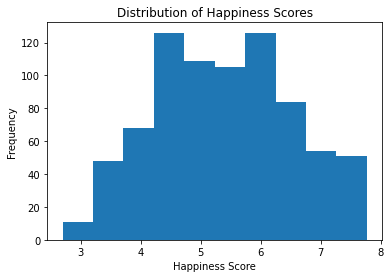

In [14]:
#initialize a new figure
fig, ax = plt.subplots()

#create histogram of happiness score distribution
ax.hist(allyears['Happiness Score'])
ax.set_xlabel("Happiness Score")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Happiness Scores")

Next we looked at the central tendendcies of the Happiness Score by region. This showed that Australia and New Zealand, North America, and Western Europe all had average happiness scores much greater than the other regions of the world. This provides interesting insight into potential bias in the formulation of the survey used to obtain these results as it's hard to believe that only persons of "Western" and predominantly white regions reported significantly higher happiness. It's also interesting to note that Australia nd New Zealand have the smallest range. This is because the region is only composed of two countries. A few of the other countries are composed of twenty or more countries. 

/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Text(0.5, 0.98, 'Happiness Score by Region')

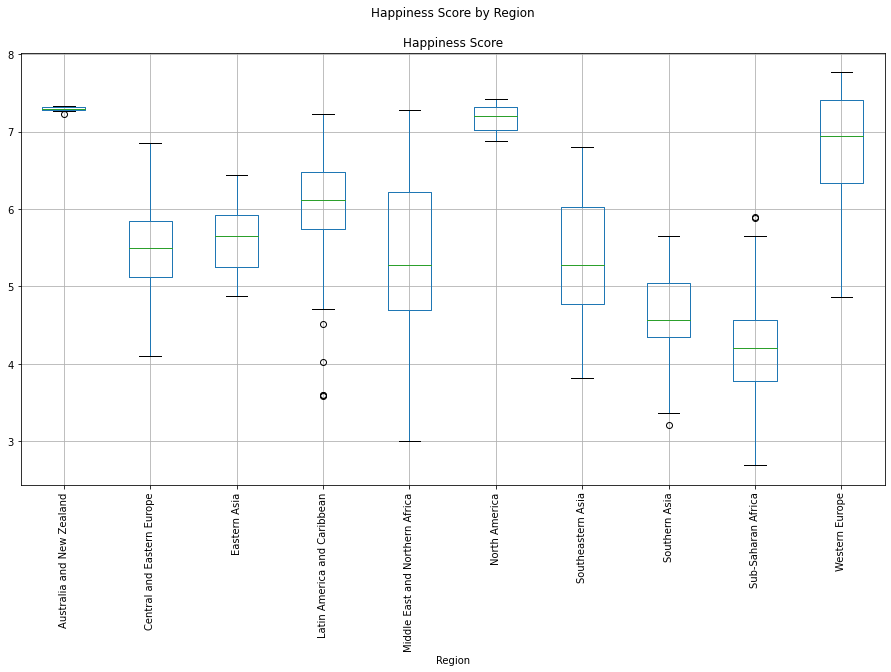

In [15]:
allyears.boxplot(column='Happiness Score', by='Region', rot=90, fontsize=10, figsize=(15,8))
plt.suptitle("Happiness Score by Region")

We then plotted the average happiness scores of by each region, across all years. This shows that the regions Australia and New Zealand, North America, and Western Europe have the highest mean happiness scores. 

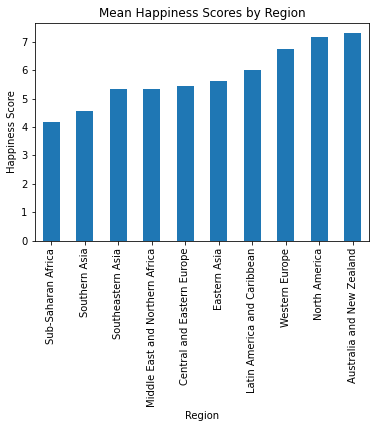

In [16]:
#Determine mean happiness of each region
meanHappiness = allyears.groupby('Region')['Happiness Score'].mean()

#Sort values
meanHappinessSorted = meanHappiness.sort_values()

#Initialize a new figure
fig, ax = plt.subplots()

#Plot figure
ax.set_ylabel("Happiness Score")
ax.set_title("Mean Happiness Scores by Region")
meanHappinessSorted.plot(kind = 'bar')

## Does Money Buy Happiness?

We wanted to answer the question "does money buy happiness?", so we looked into the correlation between a country's GDP and happiness score for 2015 data. First, we plotted a scatter plot of each countries GDP vs. Happiness Score. The visualization revealed that these two measures were correlated because they surrounded the line across the diagnol of the graph. We assigned colors to each region so that we could tell if specific regions saw correlations while others didn't.

In [17]:
#Find all unique regions
h_2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

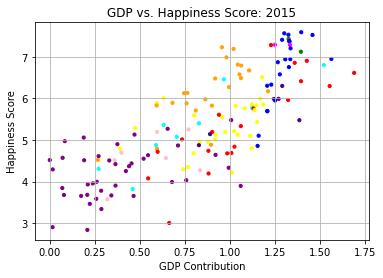

In [18]:
#Map colors to different regions
colors = h_2015["Region"].map({
    "Western Europe": "blue",
    "North America": "green",
    "Australia and New Zealand": "magenta",
    "Middle East and Northern Africa": "red",
    "Latin America and Caribbean": "orange",
    "Southeastern Asia": "cyan",
    "Central and Eastern Europe": "yellow",
    "Eastern Asia": "indigo",
    "Sub-Saharan Africa": "purple",
    "Southern Asia": "pink"
})


#Initialize a new figure
fig, ax = plt.subplots()
x = h_2015["GDP"]
y = h_2015["Happiness Score"]

#Plot scatter plot
scatter = ax.scatter(x, y, c=colors, s=10, label = colors)
ax.set_title('GDP vs. Happiness Score: 2015')
ax.set_xlabel('GDP Contribution')
ax.set_ylabel('Happiness Score')
ax.grid(True)

plt.show()

After noticing the impact of the region in terms of the significance money or economy has on a country's happiness, we decided to visualize said impact on a global map. This map shows the average, from 2015-2019, extent to which GDP contributes to a country's overall happiness score. The darker the country, the more of an impact GDP has on happiness. It was interesting to see that the United States average contribution of GDP to happiness score over the years was one of the lowest. 

In [19]:
countrymeanGDP = allyears.groupby('Country')['GDP'].mean()
map_data = dict(type = 'choropleth', 
           locations = h_2015['Country'],
           locationmode = 'country names',
           z = countrymeanGDP, 
           text = h_2015['Country'],
           colorscale = 'Greens',
           reversescale = True,
           colorbar = {'title':'Impact on Happiness'})

layout = dict(title = 'Average Contribution of GDP to Happiness Score', geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))

index_map = go.Figure(data = [map_data], layout=layout)
iplot(index_map)

## Taking a Closer Look at Variable Correlations

Next we wanted to look at the correlation between other variables. We plotted each correlation on a heatmap. This visualization confirmed that GDP had the greatest correlation with the Happiness Score, followed by Freedom and Trust. 

In [20]:
#Show correlation matrix
corr = allyears.corr()
corr

,Happiness Rank,Happiness Score,GDP,Freedom,Trust,Generosity,Year
Happiness Rank,1.000000,-0.992066,-0.794791,-0.537942,-0.372781,-0.117713,-0.007768
Happiness Score,-0.992066,1.000000,0.789284,0.551258,0.398418,0.137578,0.007065
GDP,-0.794791,0.789284,1.000000,0.340511,0.306307,-0.014560,0.019768
Freedom,-0.537942,0.551258,0.340511,1.000000,0.459593,0.290706,0.010353
Trust,-0.372781,0.398418,0.306307,0.459593,1.000000,0.318920,-0.122264
Generosity,-0.117713,0.137578,-0.014560,0.290706,0.318920,1.000000,-0.192587
Year,-0.007768,0.007065,0.019768,0.010353,-0.122264,-0.192587,1.000000


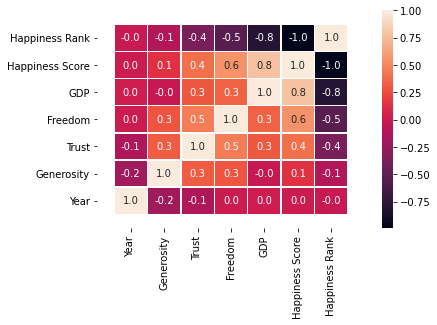

In [21]:
import seaborn as sns

#Instantiate new figure
fig, ax = plt.subplots()

#Plot heatmap showing correlations of each variable
sns.heatmap(corr, annot=True, linewidths = .5, fmt='.1f',ax=ax)
ax.set_ylim(len(corr)+0.5, -0.5)
ax.set_xlim(len(corr)+0.5, -0.5)
plt.show()

It's important to remember that the GDP variable does not designate each country's wealth, but rather how survey-takers from those countries indicated that their economy affected their happiness. Therefore, our finding a correlation between these two variables shows that generally, people's happiness is affected by their country's economy. 

### Where Does Money Buy Happiness?
We wanted to look at the regions that had the strongest and weakest correlations between GDP and Happiness Score. This might indicate where people feel they need wealth to be happy, which might indicate where governments are more likely to previde basic needs, eliminating stress. It might also indicate areas where wealth does or doesn't determine status. 

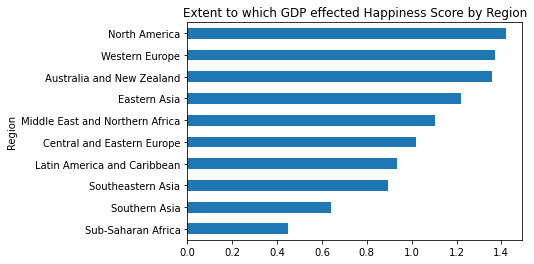

In [22]:
#Determine mean GDP of each region
meanGDP = allyears.groupby('Region')['GDP'].mean()

#Sort values
meanGDPSorted = meanGDP.sort_values()

#Initialize a new figure
fig, ax = plt.subplots()

#Plot figure
ax.set_ylabel("GDP Score")
ax.set_title("Extent to which GDP effected Happiness Score by Region")
meanGDPSorted.plot(kind = 'barh')

This visualization shows that the same regions that reported the highest Happiness Scores are the same countries that reported their country's economic stability having a large impact on their happiness. It would be interesting to look into the types of governments most present in each region. Maybe countries with more capitalist economies cause people's happiness to be more affected by their wealth in comparison to countries with a more socialist economy. 

## How Did the 2016 US Election Effect American's Trust in their Government?
The figure below shows a decrease in American's trust in their government over the years that the data provided. We believe the answer to this question would be more accurate had the survey been taken more frequently than annually, or had there been more data from years prior to 2015. More data must be collected in future years to determine whether this result is an effect of the 2016 election or just normal noise in the data collection.

In [23]:
#Locate the United States data over the years
us = allyears.loc[allyears.Country=='United States']

#find the average trust across all countries for each year
av = allyears.groupby('Year')['Trust'].mean()

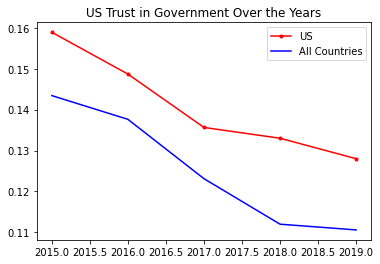

In [24]:
#Initialize a new figure
fig, ax = plt.subplots()

#Plot US data
ax.plot(us['Year'], us['Trust'], c='r', label = 'US', marker = '.')

#Visualize Trust in Other Countries Over the Years
ax.plot(av, c='b', label = 'All Countries')

#set labels
ax.set_title('US Trust in Government Over the Years')
ax.legend()
plt.show()

By comparing the US's trust in governement to the average trust in government across all countries, it's clear that the downward trend we see in the US data is not anything outstanding. It would be interesting to see how this trend continues in the next decade, as we see democracies internationally losing the ability to conduct free and fair elections. 

Next we looked at the Trust coefficient by region. The United States is marked by a bold black line. Australia nd New Zealand seem to have the most trust in their governments. It's clear that most regions saw a downward trend between 2015 and 2019.

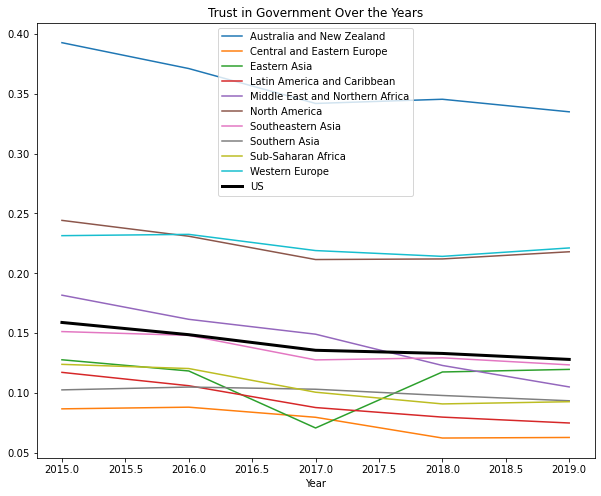

In [25]:
#Initialize a new figure
fig, ax = plt.subplots()

#plot each region
allyears.groupby(['Year', 'Region'])['Trust'].mean().unstack().plot(ax = ax, figsize=(10,8))

#Plot US data
ax.plot(us['Year'], us['Trust'], c='k', label = 'US', linewidth = 3)

#set labels
ax.set_title('Trust in Government Over the Years')
ax.legend()
plt.show()

## Summary of Conclusions
Our analysis of the world Happiness report offered insight onto the state of happiness in the world, and posed interesting questions for future analysis. First, we studied the breakdown of happiness by region. Uur results showed that North America, New Zealand and Australia, and Western Europe had significantly higher happiness scores. Due to the fact that these are predominantly white, “western” regions, we are questioning if  the survey was conducted more favorable to specific cultural interpretations of happiness. By analyzing the correlations between happiness score and each variable, we found that a country’s GDP had the highest correlation to happiness score, at a value of 0.8. We also found that American’s trust in their government decreased steadily between 2015-2019. While data across these four years is not enough to draw a definitive conclusion, we hope that the future collection of happiness data offers an answer to our posed question. 
